In [10]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tifffile as tiff 
from tqdm.auto import tqdm

from utils.rlemask import mask2rle, rle2mask

plt.style.use("Solarize_Light2")

In [5]:
class config:
    BASE_PATH = "/run/media/viper/LSP/Kaggle/hubmap-organ-segmentation/"
    TRAIN_PATH = os.path.join(BASE_PATH, "train")

In [6]:
df = pd.read_csv(
    os.path.join(config.BASE_PATH, "train.csv")
)
df.head()

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female


In [8]:
df["img_height"].value_counts()

3000    326
2631      2
2416      2
2942      2
2790      2
2764      2
2654      2
2539      1
2680      1
2727      1
2308      1
2867      1
2783      1
2869      1
2760      1
2630      1
2511      1
2593      1
2675      1
3070      1
Name: img_height, dtype: int64

In [7]:
img_id_1 = 10044
img_1 = tiff.imread(config.BASE_PATH + "train_images/" + str(img_id_1) + ".tiff")
print(img_1.shape)

(3000, 3000, 3)


(-0.5, 2999.5, 2999.5, -0.5)

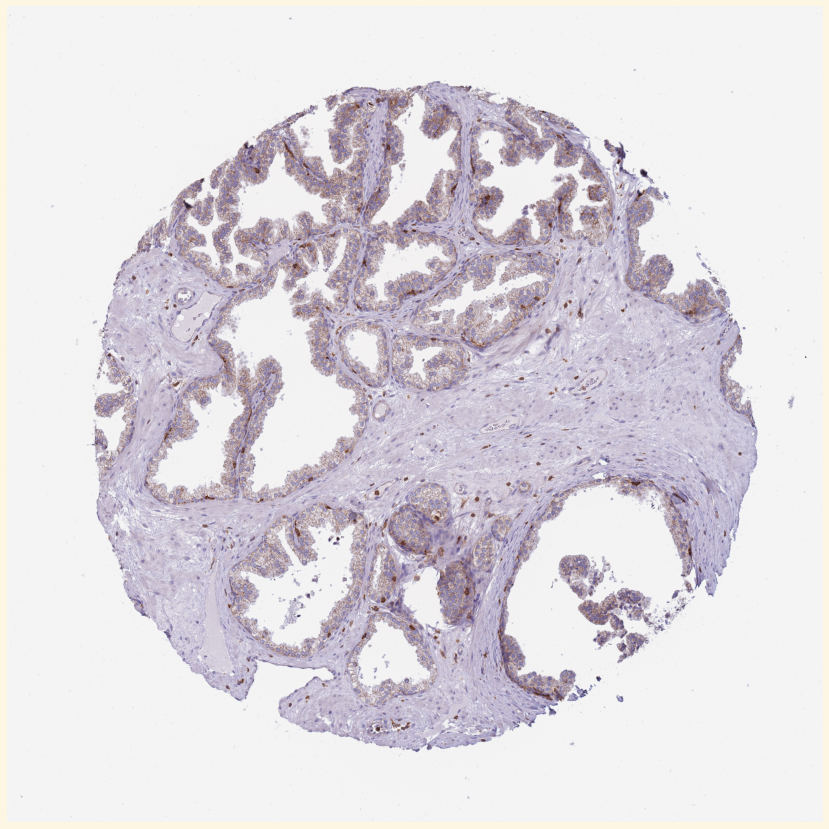

In [9]:
plt.figure(figsize=(15, 15))
plt.imshow(img_1)
plt.axis("off")

In [20]:
mask_1 = rle2mask(df[df["id"] == img_id_1]["rle"].iloc[0], (img_1.shape[1], img_1.shape[0]))
mask_1.shape

(3000, 3000)

(-0.5, 2999.5, 2999.5, -0.5)

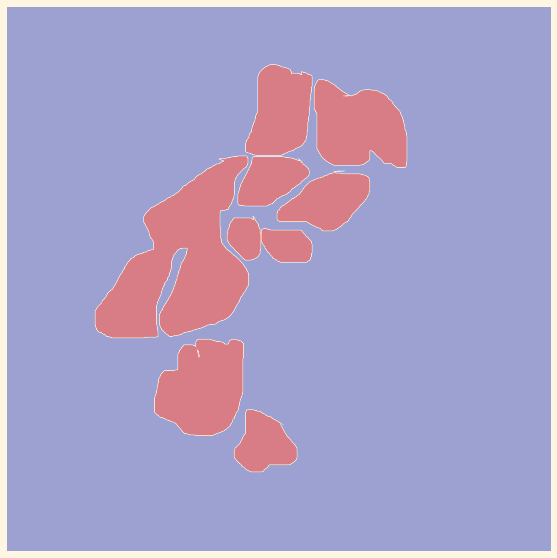

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(mask_1, cmap='coolwarm', alpha=0.5)
plt.axis("off")

(-0.5, 2999.5, 2999.5, -0.5)

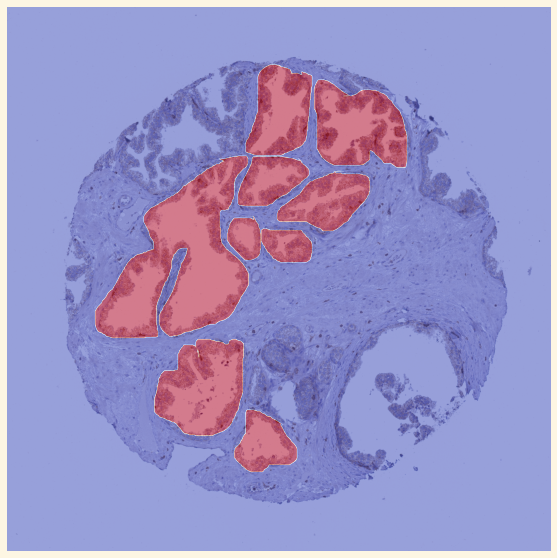

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img_1)
plt.imshow(mask_1, cmap='coolwarm', alpha=0.5)
plt.axis("off")

In [24]:
image_ids = df.id
image_files = glob.glob(config.BASE_PATH + "/train_images/*")

Text(0.5, 1.0, 'Organ Counts')

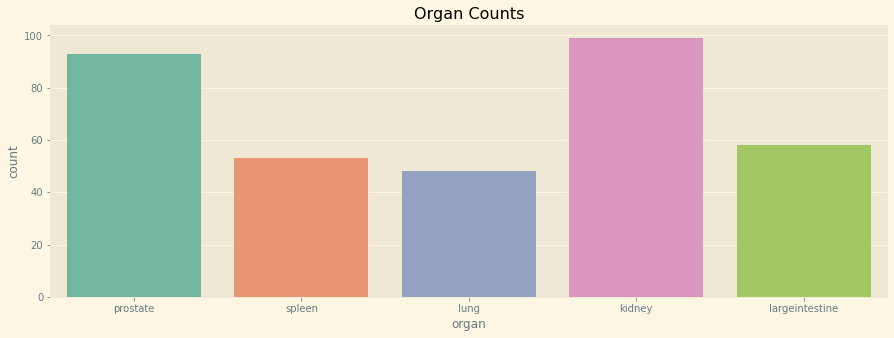

In [26]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x="organ", palette=sns.color_palette("Set2", 8))
g.set_title("Organ Counts", color = "black")

Text(0.5, 1.0, 'Data Source')

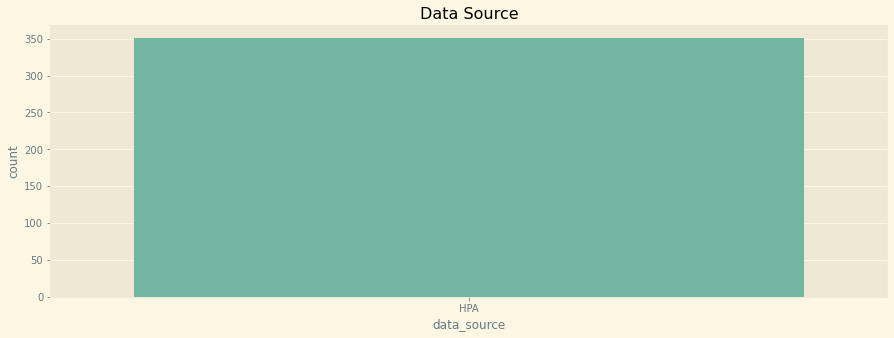

In [32]:
plt.figure(figsize=(15, 5))
g = sns.countplot(data=df, x="data_source", palette=sns.color_palette("Set2", 8))
g.set_title("Data Source", color = "black")

Text(0.5, 1.0, 'Age')

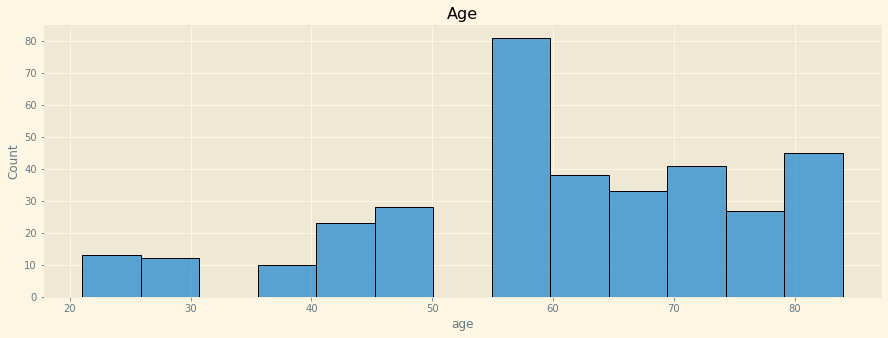

In [33]:
plt.figure(figsize=(15, 5))
g = sns.histplot(data=df, x="age", palette=sns.color_palette("Set2", 8))
g.set_title("Age", color = "black")

Text(0.5, 1.0, 'Sex')

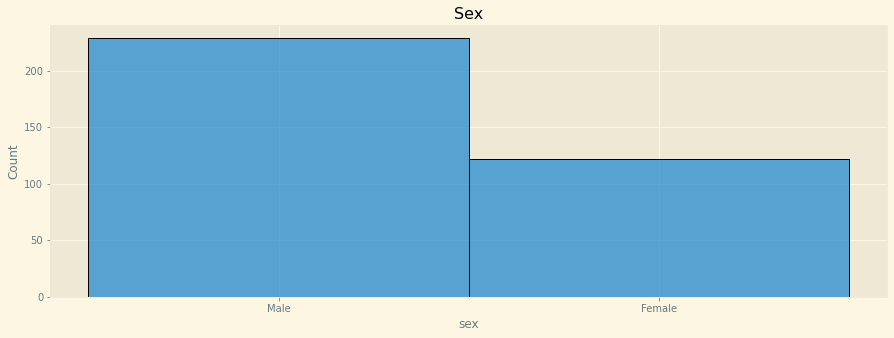

In [34]:
plt.figure(figsize=(15, 5))
g = sns.histplot(data=df, x="sex", palette=sns.color_palette("Set2", 8))
g.set_title("Sex", color = "black")